In [1]:
import wbdata
import pandas as pd
from scipy.stats import pearsonr
import pandas as pd

# CSV 파일 읽기
iraq = pd.read_csv('/apps/study_promptengineerings/iraq-cutedged.csv')
developing = pd.read_csv('/apps/study_promptengineerings/least-developed.csv')


In [2]:
developing = developing.T
iraq = iraq.T

In [3]:
developing.columns = developing.iloc[0]  # 2번째 행을 컬럼으로 설정
iraq.columns = iraq.iloc[0]  # 2번째 행을 컬럼으로 설정


In [4]:
developing = developing.drop(index="Unnamed: 0")  # 인덱스 5인 행 삭제
iraq = iraq.drop(index="Unnamed: 0")  # 인덱스 5인 행 삭제


In [5]:
developing = developing.drop(columns=["Rail lines (total route-km)"])
iraq

Unnamed: 0,GDP growth (annual %),Rail lines (total route-km),Logistics performance index: Quality of trade and transport-related infrastructure (1=low to 5=high),Individuals using the Internet (% of population),Access to electricity (% of population),"School enrollment, primary (% gross)","Hospital beds (per 1,000 people)","Annual freshwater withdrawals, total (% of internal resources)",Urban population (% of total population)
2003 [YR2003],-36.65678044,1898,..,0.6,97.2,96.0836792,1.31,171.6482549,68.658
2004 [YR2004],53.38554729,1898,..,0.9,97.3,95.07543945,1.32,166.3713474,68.712
2005 [YR2005],1.675228636,1898,..,0.9,97.4,..,1.28,161.0944399,68.766
2006 [YR2006],5.638299152,2032,..,0.952344,97.6,..,1.31,155.8175325,68.819
2007 [YR2007],1.888539362,..,..,0.93,98.1,103.7387009,1.13,150.540625,68.873
2008 [YR2008],8.228107104,2025,..,1,97.9,..,1.26,145.2637175,68.927
2009 [YR2009],3.379299094,..,..,1.06,98.1,..,1.1,139.9868101,68.98
2010 [YR2010],6.402564845,2138,1.73,2.5,98.4,..,1.1,134.7099026,69.103
2011 [YR2011],7.5464712,..,..,5,98,..,1.3,129.4329951,69.268
2012 [YR2012],13.93643017,..,1.92,7.1,99.3,..,1.29,124.1418831,69.432


In [6]:
# ".." 값을 NaN으로 변환
# NaN 값을 위아래 인접한 값으로 채우기 (전체 컬럼에 적용)
developing.replace("..", pd.NA, inplace=True)
developing = developing.fillna(method="ffill").fillna(method="bfill")
iraq.replace("..", pd.NA, inplace=True)
iraq = iraq.fillna(method="ffill").fillna(method="bfill")

iraq
developing


Unnamed: 0,GDP growth (annual %),Logistics performance index: Quality of trade and transport-related infrastructure (1=low to 5=high),Individuals using the Internet (% of population),Access to electricity (% of population),"School enrollment, primary (% gross)","Hospital beds (per 1,000 people)","Annual freshwater withdrawals, total (% of internal resources)",Urban population (% of total population)
1960 [YR1960],7.480243191,2.0145,0,20.22805424,50.14373016,1.263299632,4.394457012,9.651308684
1961 [YR1961],7.480243191,2.0145,0,20.22805424,50.14373016,1.263299632,4.394457012,9.897056329
1962 [YR1962],7.480243191,2.0145,0,20.22805424,50.14373016,1.263299632,4.394457012,10.16451526
1963 [YR1963],2.039086373,2.0145,0,20.22805424,50.14373016,1.263299632,4.394457012,10.44712399
1964 [YR1964],3.672144475,2.0145,0,20.22805424,50.14373016,1.263299632,4.394457012,10.74379188
...,...,...,...,...,...,...,...,...
2019 [YR2019],5.075955233,2.133157895,22.97457281,52.87871227,104.4037323,0.628525671,4.444817031,34.2024921
2020 [YR2020],-0.112639131,2.133157895,25.32454155,54.47368401,104.8018875,0.628525671,4.444817031,34.74092288
2021 [YR2021],2.830079741,2.133157895,28.28020687,56.10553736,103.8222198,0.628525671,4.444817031,35.28907287
2022 [YR2022],4.640437711,2.229166667,30.71570631,56.70485654,103.5987701,0.628525671,4.444817031,35.84971358


In [7]:
# 특정 열과 나머지 열들 간의 상관관계 계산
iraq_correlation = iraq.corr()["GDP growth (annual %)"].drop("GDP growth (annual %)")
print(iraq_correlation)


Unnamed: 0
Rail lines (total route-km)                                                                            -0.125551
Logistics performance index: Quality of trade and transport-related infrastructure (1=low to 5=high)   -0.121092
Individuals using the Internet (% of population)                                                       -0.170714
Access to electricity (% of population)                                                                -0.103815
School enrollment, primary (% gross)                                                                   -0.093688
Hospital beds (per 1,000 people)                                                                        0.139410
Annual freshwater withdrawals, total (% of internal resources)                                          0.010724
Urban population (% of total population)                                                               -0.147157
Name: GDP growth (annual %), dtype: float64


In [8]:
developing_correlation = developing.corr()["GDP growth (annual %)"].drop("GDP growth (annual %)")
print(developing_correlation)

Unnamed: 0
Logistics performance index: Quality of trade and transport-related infrastructure (1=low to 5=high)    0.081679
Individuals using the Internet (% of population)                                                        0.037292
Access to electricity (% of population)                                                                 0.149416
School enrollment, primary (% gross)                                                                    0.308580
Hospital beds (per 1,000 people)                                                                       -0.073773
Annual freshwater withdrawals, total (% of internal resources)                                         -0.022732
Urban population (% of total population)                                                                0.217738
Name: GDP growth (annual %), dtype: float64


In [9]:
corr_diff = developing_correlation - iraq_correlation

Iraq Vs Least Developed Countries

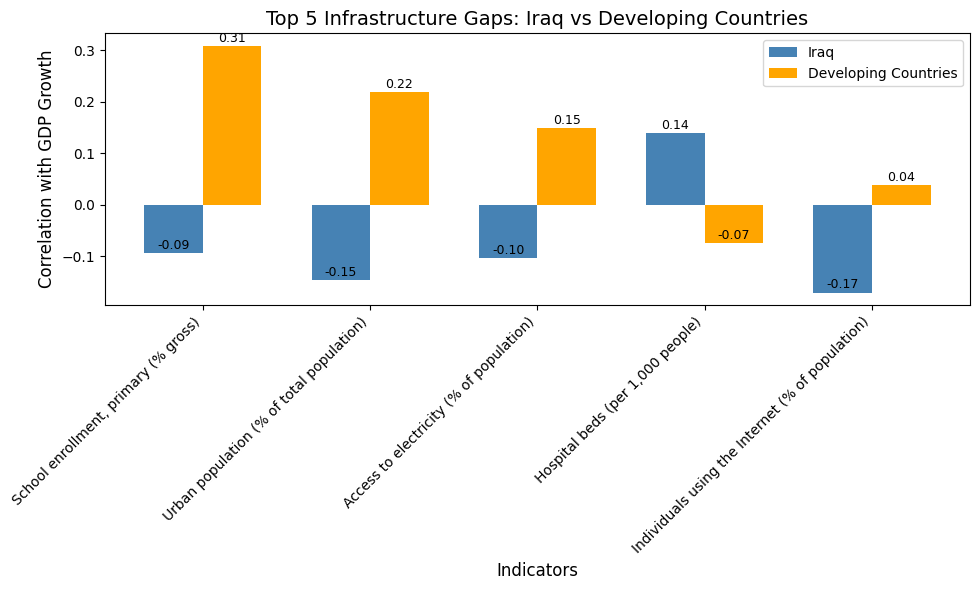

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 격차가 큰 상위 5개 지표 추출
top_5_gap = corr_diff.abs().sort_values(ascending=False).head(5)
top_5_gap_names = top_5_gap.index

# 시각화를 위해 이라크와 개발도상국의 상관관계 값 추출
iraq_top_5 = iraq_correlation[top_5_gap_names]
developing_top_5 = developing_correlation[top_5_gap_names]

# 막대 그래프로 격차 시각화
x = np.arange(len(top_5_gap_names))  # 지표 개수만큼 x축 생성
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(10, 6))

# 이라크 데이터 막대
bars1 = ax.bar(x - width/2, iraq_top_5, width, label='Iraq', color='steelblue')

# 개발도상국 데이터 막대
bars2 = ax.bar(x + width/2, developing_top_5, width, label='Developing Countries', color='orange')

# 그래프 세부 설정
ax.set_xlabel('Indicators', fontsize=12)
ax.set_ylabel('Correlation with GDP Growth', fontsize=12)
ax.set_title('Top 5 Infrastructure Gaps: Iraq vs Developing Countries', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(top_5_gap_names, rotation=45, ha='right', fontsize=10)
ax.legend()

# 값 표시
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


## Iraq reconstruction potential analysis

In [11]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 독립 변수(X)와 종속 변수(y) 분리
X_train = developing.drop("GDP growth (annual %)", axis=1)
y_train = developing["GDP growth (annual %)"]

X_test = iraq.drop("GDP growth (annual %)", axis=1)
y_test = iraq["GDP growth (annual %)"]


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [12]:

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

X_train = X_train.fillna(0)  # 결측값을 0으로 채움

# XGBoost 모델 초기화 및 학습
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 이라크 데이터로 GDP 성장률 예측
iraq_prediction = model.predict(X_test)
print(f"Predicted GDP Growth for Iraq (Post-Reconstruction): {iraq_prediction[0]:.2f}%")


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Rail lines (total route-km): object, Logistics performance index: Quality of trade and transport-related infrastructure (1=low to 5=high): object, Individuals using the Internet (% of population): object, Access to electricity (% of population): object, School enrollment, primary (% gross): object, Hospital beds (per 1,000 people): object, Annual freshwater withdrawals, total (% of internal resources): object, Urban population (% of total population): object

In [ ]:

# 중요 변수 시각화
importance = model.feature_importances_
features = X_train.columns



plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in GDP Growth Prediction")
plt.show()